In [1]:
import os
os.chdir('../')
from solution import *

In [2]:
data_dir = os.curdir
output_dir = os.curdir
raw_train_data = np.load(os.path.join(data_dir, 'train_data.npz'))
x_train = torch.from_numpy(raw_train_data['train_x']).reshape([-1, 784])
y_train = torch.from_numpy(raw_train_data['train_y']).long()
dataset_train = torch.utils.data.TensorDataset(x_train, y_train)

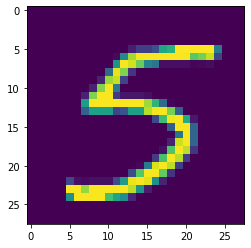

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0].reshape(28,28))

In [6]:
run_solution(dataset_train, data_dir=data_dir, output_dir=output_dir, model=Model(use_densenet=True))

Using a DenseNet model for comparison
Training model


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [07:18<00:00,  3.85s/it, acc=1, loss=0.000201]


Evaluating model on training data
Accuracy: 1.000, ECE score: 0.000


In [13]:
gauss2 = torch.distributions.multivariate_normal.MultivariateNormal(torch.Tensor([0.0, 0.0]), torch.Tensor([[1.0, 0.5], [0.5, 1.0]]))

In [14]:
gauss2.log_prob(torch.Tensor([[0.0, 0.1], [-0.1, 0.0]]))

tensor([-1.7007, -1.7007])

In [15]:
gauss2.log_prob(torch.Tensor([[0.0, 0.1], [-0.1, 0.0], [1.0, 1.0]]))

tensor([-1.7007, -1.7007, -2.3607])

In [16]:
gauss2.sample()

tensor([ 0.0013, -0.3700])

In [26]:
rho = torch.Tensor([0.0, 0.1, 0.5, 1.0])
softplus = torch.nn.Softplus()
foo = softplus(rho)
print(foo)

tensor([0.6931, 0.7444, 0.9741, 1.3133])


In [25]:
help(foo)

Help on Softplus in module torch.nn.modules.activation object:

class Softplus(torch.nn.modules.module.Module)
 |  Softplus(beta: int = 1, threshold: int = 20) -> None
 |  
 |  Applies the element-wise function:
 |  
 |  .. math::
 |      \text{Softplus}(x) = \frac{1}{\beta} * \log(1 + \exp(\beta * x))
 |  
 |  SoftPlus is a smooth approximation to the ReLU function and can be used
 |  to constrain the output of a machine to always be positive.
 |  
 |  For numerical stability the implementation reverts to the linear function
 |  when :math:`input \times \beta > threshold`.
 |  
 |  Args:
 |      beta: the :math:`\beta` value for the Softplus formulation. Default: 1
 |      threshold: values above this revert to a linear function. Default: 20
 |  
 |  Shape:
 |      - Input: :math:`(N, *)` where `*` means, any number of additional
 |        dimensions
 |      - Output: :math:`(N, *)`, same shape as the input
 |  
 |  .. image:: ../scripts/activation_images/Softplus.png
 |  
 |  Example

In [28]:
torch.diag(foo)

tensor([[0.6931, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.7444, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.9741, 0.0000],
        [0.0000, 0.0000, 0.0000, 1.3133]])

In [ ]:
np.log